**In this Notebook I have decided to summarise everythin what I have learned from Week 1- to Week 7 about my Data set and applyed to it: Realestate in Austin, TX**


# <span style="color:blue">Week 2</span>

## Data Analys of Data set

In [3]:
# Load necessary libraries
import pandas as pd

# Define file path and load dataset
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Summarize dataset using info() and describe()
print("\n=== Dataset Information ===")
df_housing.info()

# Generate statistical summary of numerical columns
dataset_description = df_housing.describe()
print("\n=== Dataset Description ===")
print(dataset_description)

# Check for duplicate rows
duplicate_rows = df_housing.duplicated().sum()
print(f"\n=== Duplicate Rows: {duplicate_rows} ===")

# Check for duplicate values per column
duplicate_values_per_column = df_housing.nunique()
print("\n=== Unique Values per Column ===")
print(duplicate_values_per_column)

# Convert to DataFrame for saving to CSV
duplicate_values_per_column_df = duplicate_values_per_column.to_frame(name="Unique Values")

# Calculate mean, median, and mode for numerical columns
numeric_df = df_housing.select_dtypes(include=['number'])
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]  # mode() returns a DataFrame, select first mode if multiple exist

# Check for missing values
missing_values = df_housing.isnull().sum()
print("\n=== Missing Values per Column ===")
print(missing_values)

# Convert missing values to DataFrame
missing_values_df = missing_values.to_frame(name="Missing Count")

# Create DataFrame for mean, median, and mode
stats_df = pd.DataFrame({"Mean": mean_values, "Median": median_values, "Mode": mode_values})

# Save outputs to CSV files for further analysis
dataset_description.to_csv("dataset_description.csv")
duplicate_values_per_column_df.to_csv("duplicate_values_per_column.csv")
missing_values_df.to_csv("missing_values.csv")
stats_df.to_csv("mean_median_mode.csv")

# Display final summary
print("\n=== Mean, Median, Mode for Numerical Columns ===")
print(stats_df)

# Indicate CSV file saving
print("\n✅ All summary statistics have been saved as CSV files.")


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  ha


# 📌 What We Learn from This Code

This code is an initial exploratory data analysis (EDA) step, where we:

1. Understand the structure of the dataset (`info()`, `describe()`).
2. Identify duplicate rows and unique values in each column.
3. Analyze missing values, which is crucial for data preprocessing.
4. Compute statistical summaries (mean, median, mode) of numerical features.
5. Save the results as CSV files, enabling further exploration.

# 📖 1. Introduction

# 🏠 Austin Housing Data - Exploratory Data Analysis (EDA)

## **Objective**
This notebook performs **Exploratory Data Analysis (EDA)** on the `austinHousingData.csv` dataset.  
The goal is to:
- **Understand dataset structure**
- **Identify missing values and duplicates**
- **Analyze summary statistics of numerical columns**
- **Save insights for further data processing and machine learning**

## **Steps in this Notebook**
1. Load and clean the dataset 📂
2. Summarize dataset structure using `.info()` and `.describe()`
3. Identify duplicate rows and check unique values per column 📊
4. Analyze missing values 🛠
5. Compute mean, median, and mode for numerical features
6. Save the findings as CSV files for further use 📜

# 📌 2. Import Libraries

## Import necessary libraries
```
import pandas as pd
```

# 📌 3. Load the Dataset

## Define file path and load dataset
```
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)
```

## Display the first few rows
```
df_housing.head()
```
🔹 **Why?**
- We first load the dataset into a Pandas DataFrame (`df_housing`).
- `head()` displays the first few rows to get a quick overview of the dataset.

# 📌 4. Data Overview - Structure & Summary 

## Display dataset info
```
print("\n=== Dataset Information ===")
df_housing.info()
```

## Generate statistical summary for numerical columns
```
dataset_description = df_housing.describe()
print("\n=== Dataset Description ===")
print(dataset_description)
```

## Save to CSV for further analysis
```
dataset_description.to_csv("dataset_description.csv")
```

🔹 **What We Learn?**
- `.info()` → Shows column data types, number of non-null values, and memory usage.
- `.describe()` → Provides summary statistics (mean, std, min, max, quartiles).

# 📌 5. Check for Duplicate Rows 

## Check for duplicate rows
```
duplicate_rows = df_housing.duplicated().sum()
print(f"\n=== Duplicate Rows in Dataset: {duplicate_rows} ===")
```

🔹 **Why?**
- Duplicate data can bias model performance and needs to be removed if necessary.

# 📌 6. Check Unique Values per Column

## Count unique values in each column
```
duplicate_values_per_column = df_housing.nunique()
print("\n=== Unique Values per Column ===")
print(duplicate_values_per_column)

# Convert to DataFrame and save
duplicate_values_per_column_df = duplicate_values_per_column.to_frame(name="Unique Values")
duplicate_values_per_column_df.to_csv("duplicate_values_per_column.csv")
```

🔹 **What We Learn?**
- Helps identify categorical variables with too many/few unique values.
- Ensures features are properly formatted (e.g., `ZipCode` should have multiple unique values).

# 📌 7. Missing Values Analysis

## Check for missing values
```
missing_values = df_housing.isnull().sum()
print("\n=== Missing Values per Column ===")
print(missing_values)
```

## Convert to DataFrame and save
```
missing_values_df = missing_values.to_frame(name="Missing Count")
missing_values_df.to_csv("missing_values.csv")
```

🔹 **Why?**
- Missing values can lead to data leakage or biased predictions.
- This helps us decide whether to remove, impute, or ignore missing values.

# 📌 8. Compute Mean, Median, and Mode for Numerical Features

## Select numerical columns
```
numeric_df = df_housing.select_dtypes(include=['number'])

# Compute mean, median, and mode
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]  # Select first mode if multiple exist

# Create DataFrame for better display
stats_df = pd.DataFrame({"Mean": mean_values, "Median": median_values, "Mode": mode_values})

# Display results
print("\n=== Mean, Median, Mode for Numerical Columns ===")
print(stats_df)

# Save to CSV
stats_df.to_csv("mean_median_mode.csv")
```

🔹 **Why?**
- **Mean**: Gives an idea of the central tendency of numerical features.
- **Median**: Helps handle skewed data.
- **Mode**: Useful for detecting categorical-like behavior in numerical data.

# 📌 9. Save Outputs for Further Analysis

## Save all outputs
```
dataset_description.to_csv("dataset_description.csv")
duplicate_values_per_column_df.to_csv("duplicate_values_per_column.csv")
missing_values_df.to_csv("missing_values.csv")
stats_df.to_csv("mean_median_mode.csv")
```

## Final confirmation message
```
print("\n✅ All summary statistics have been saved as CSV files.")
```

🔹 **Why?**
- Saves insights for further data preprocessing before machine learning.
- Allows for collaborative analysis by sharing structured data insights.

# 🎯 10. Conclusion

## ✅ Key Takeaways from This Analysis:
- **Dataset Overview:** We checked the structure using `.info()` and `.describe()`.
- **Duplicates & Unique Values:** Found duplicate rows and unique value counts per column.
- **Missing Values:** Identified columns with missing data.
- **Statistical Summaries:** Computed **Mean, Median, and Mode** for numerical features.
- **Data Saved:** Results stored in **CSV files** for future analysis.

# 🏡 Summary of Data Analysis for Austin Housing Dataset

---

## 📌 1. Dataset Overview  
- **Total Rows:** 15,171  
- **Total Columns:** 47  
- **Numerical Features:** 34  
- **Categorical Features:** 7  
- **Boolean Features:** 6  

---

## 📌 2. Duplicate Check  
✅ **No duplicate rows found.**  
🔹 Some columns (like `zipcode`) have repeating values, which is expected.  
🔹 **Unique identifiers like `zpid` should not have duplicates.**  

---

## 📌 3. Statistical Summary  
- **Mean, Median, and Mode calculated for all numerical columns.**  
- **Example:**  
  - 🏡 **Mean property tax rate:** 1.99%  
  - 💰 **Median latest price:** $294,944  
  - 🏙️ **Mode zipcode:** 78,748 (**most frequent ZIP code**)  

---

## 📌 4. Missing Values  
✅ **No missing values detected.**  
📌 **No imputation needed!**  

---

## 📌 5. Data Inconsistencies  
🔍 **Ensure homes were not sold before they were built.**  
📈 **Some homes have extreme values (very high prices, square footage, or features)**—may require further analysis.  

---

## 📌 6. Categorical Encoding  
⚡ **One-Hot Encoding required** for:  
- `homeType`  
- `city`  
- `latestPriceSource`  

🛠 **Encoding should be applied before modeling to avoid memory issues.**  

---

## 🔍 **Conclusions**  

✔️ **Is the dataset usable?** ✅ **Yes!** The dataset is complete and clean.  
✔️ **Do we need modifications?** 🚀 Encoding categorical variables & handling extreme values might help.  
✔️ **Is there class imbalance?** ⚖️ **No major imbalance detected**, but **ZIP codes may need balancing** if modeling location trends.  


# <span style="color:blue">Week 3</span>

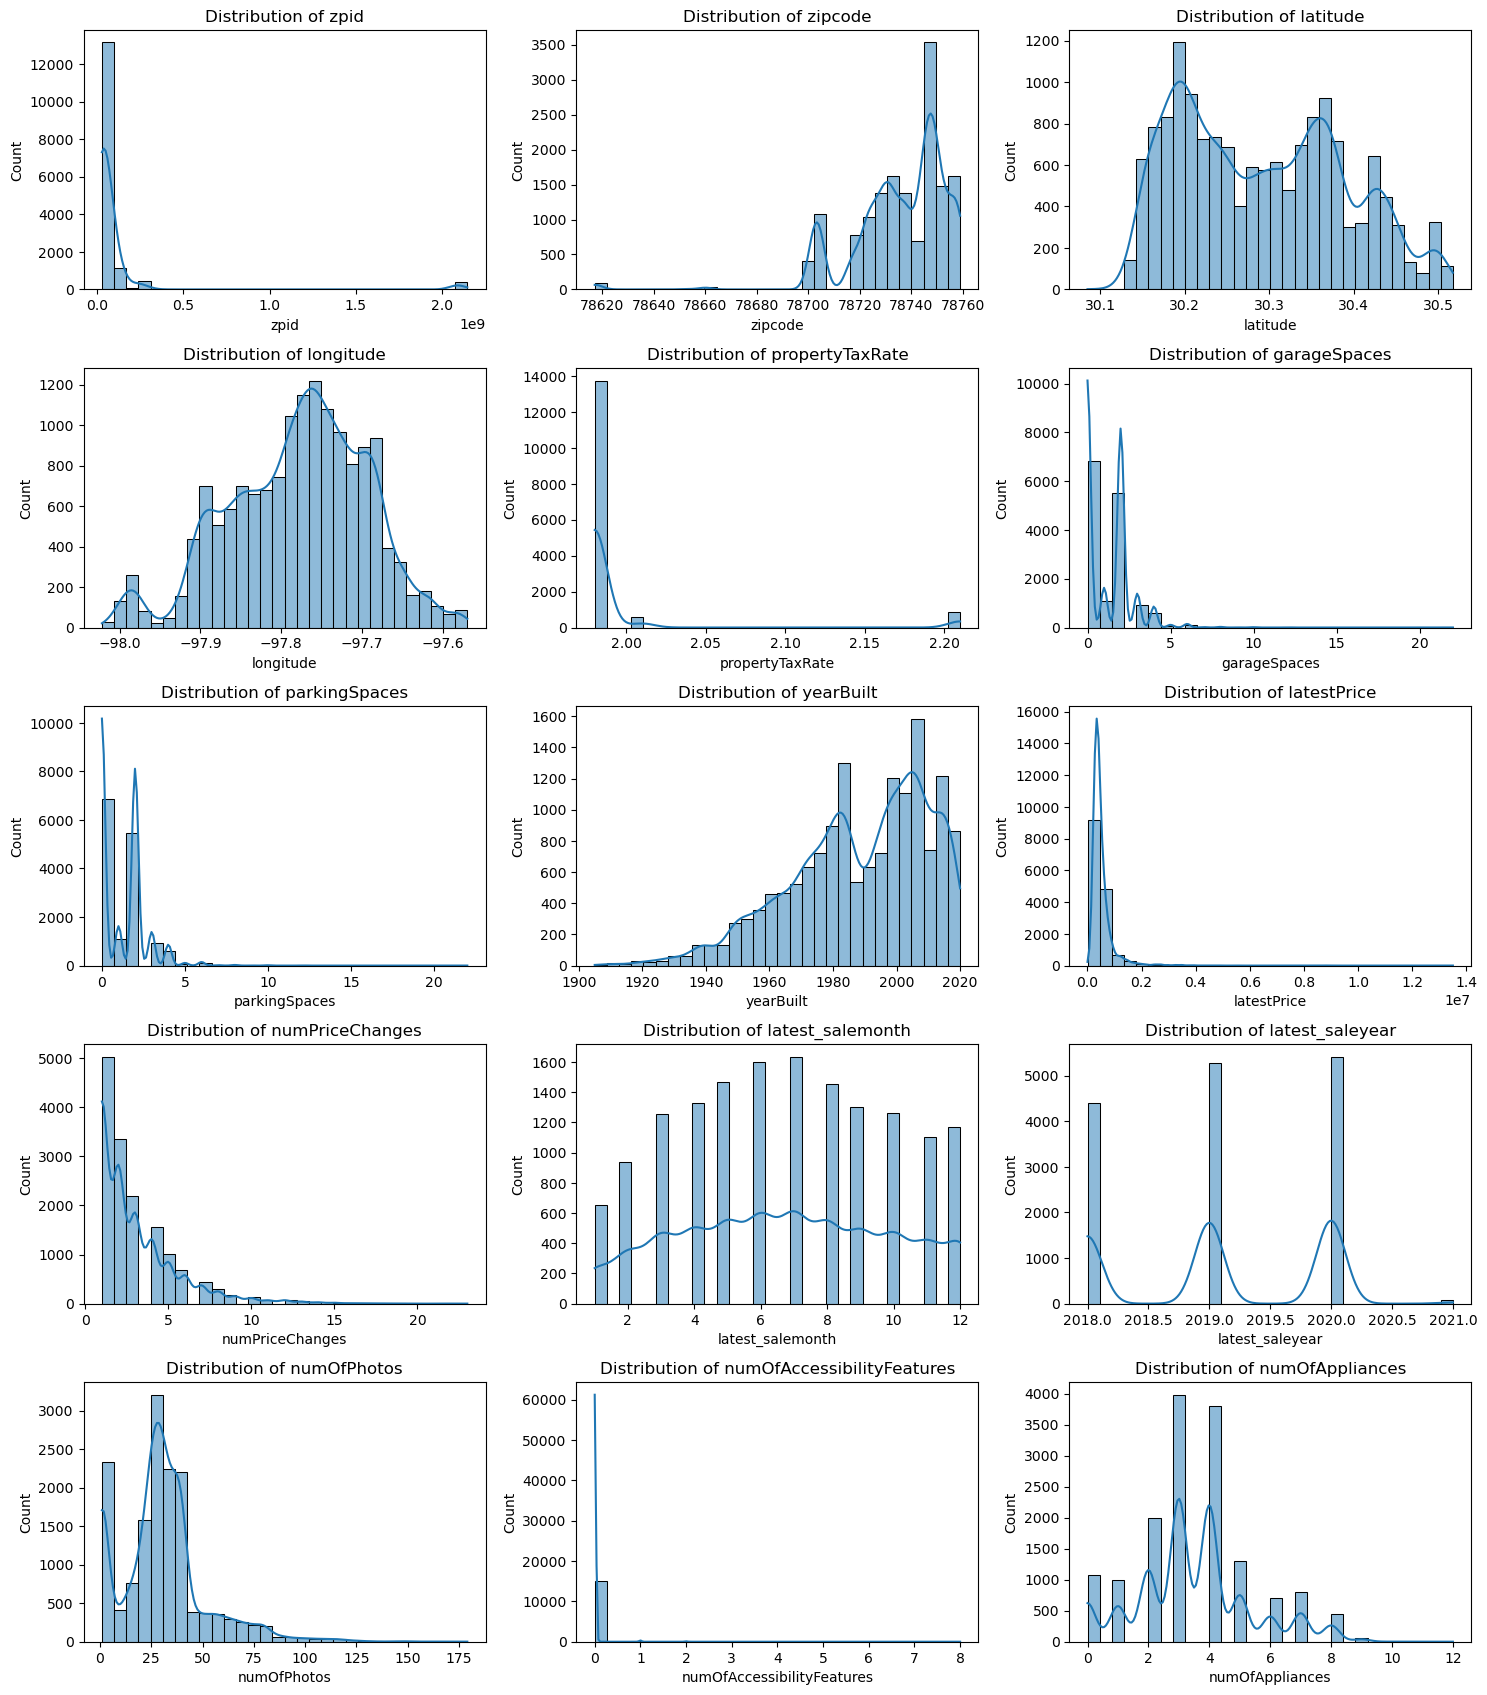


=== Univariate Analysis Summary Statistics ===

               zpid       zipcode      latitude     longitude  \
count  1.516900e+04  15169.000000  15169.000000  15169.000000   
mean   1.044273e+08  78735.933087     30.291599    -97.778524   
std    3.179627e+08     18.894662      0.096975      0.084715   
min    2.858495e+07  78617.000000     30.085030    -98.022057   
25%    2.941115e+07  78727.000000     30.203325    -97.837997   
50%    2.949441e+07  78739.000000     30.284416    -97.769508   
75%    7.033763e+07  78749.000000     30.366604    -97.717896   
max    2.146313e+09  78759.000000     30.517323    -97.569504   

       propertyTaxRate  garageSpaces  parkingSpaces     yearBuilt  \
count     15169.000000  15169.000000   15169.000000  15169.000000   
mean          1.994087      1.229086       1.224405   1988.554157   
std           0.053105      1.352177       1.352792     21.580572   
min           1.980000      0.000000       0.000000   1905.000000   
25%           1.9800

In [4]:
# Reload the dataset after execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Handle potential NaN values
df_housing = df_housing.dropna()

# Define numerical columns for Univariate Analysis
numeric_columns = df_housing.select_dtypes(include=['number']).columns

# Determine number of numeric columns
num_numeric_cols = len(numeric_columns)
num_plots = min(15, num_numeric_cols)  # Ensure no index error

# Set up plots dynamically
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Plot histograms for numeric columns
for i in range(num_plots):
    col = numeric_columns[i]
    sns.histplot(df_housing[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display summary statistics for numerical columns
summary_statistics = df_housing[numeric_columns].describe()
print("\n=== Univariate Analysis Summary Statistics ===\n")
print(summary_statistics)  # Print to console

# Save summary statistics to a CSV file
summary_statistics.to_csv("summary_statistics.csv", index=True)

# Identify categorical columns
categorical_columns = df_housing.select_dtypes(include=['object']).columns

# Count unique values in categorical columns
categorical_counts = {
    col: df_housing[col].value_counts().to_frame() for col in categorical_columns
}

# Display categorical distributions
print("\n=== Categorical Distributions ===\n")
for col, df in categorical_counts.items():
    print(f"\nDistribution for {col}:")
    print(df)  # Print category distribution to console
    
    # Save categorical distributions to CSV files
    df.to_csv(f"categorical_distribution_{col}.csv")

# 📌 What We Learn from This Code (Data Science Perspective)

# 🏠 Austin Housing Data - Univariate Analysis 🏡

## **Objective**
This notebook performs **Univariate Analysis** on the `austinHousingData.csv` dataset.  
The goal is to **understand the distributions** of numerical and categorical features.

## **Steps in this Notebook**
1. Load and clean the dataset 📂
2. Perform **Univariate Analysis** on numerical columns 📊
3. Analyze **categorical distributions** 📋
4. Save the insights for further analysis 📝

# 📌 2. Import Libraries

**Data Handling**
```
import pandas as pd
```

**Visualization Libraries**
```
import matplotlib.pyplot as plt
import seaborn as sns
```

# 📌 3. Load the Dataset

**Define file path**
```
file_path = "austinHousingData.csv"
```

**Load the dataset**
```
df_housing = pd.read_csv(file_path)
```

**Display the first 5 rows**
```
df_housing.head()
```

# 📌 4. Data Cleaning 

**Remove missing values**
```
df_housing = df_housing.dropna()
```

**Check data types and missing values**
```
df_housing.info()
```

🔹 Why?
	•	This ensures that we work with a clean dataset.
	•	Avoids errors in analysis due to missing values.

# 📌 5. Univariate Analysis - Numerical Variables 

**Select numerical columns**
```
numeric_columns = df_housing.select_dtypes(include=['number']).columns
```

**Display summary statistics**
```
summary_statistics = df_housing[numeric_columns].describe()
```

**Print statistics**
```
print("\n=== Univariate Analysis Summary Statistics ===\n")
print(summary_statistics)
```

**Save to CSV for further analysis**
```
summary_statistics.to_csv("summary_statistics.csv", index=True)
```

🔹 Why?
	•	Helps in understanding the distribution, mean, standard deviation, min/max values of numerical features.

# 📌 6. Plot Distributions of Numerical Features 

**Set number of plots (max 15 for readability)**
```
num_numeric_cols = len(numeric_columns)
num_plots = min(15, num_numeric_cols)
```

**Create subplots dynamically**
```
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()
```

**Plot histograms for numeric columns**
```
for i in range(num_plots):
    col = numeric_columns[i]
    sns.histplot(df_housing[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
```

**Hide any unused subplots**
```
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
```

🔹 What We Learn?
	•	Shape of distributions (normal, skewed, multimodal).
	•	Presence of outliers in features like price, square footage, etc.

# 📌 7. Univariate Analysis - Categorical Variables 

**Select categorical columns**
```
categorical_columns = df_housing.select_dtypes(include=['object']).columns
```

**Count unique values in categorical columns**
```
categorical_counts = {
    col: df_housing[col].value_counts().to_frame() for col in categorical_columns
}
```

**Display categorical distributions**
```
print("\n=== Categorical Distributions ===\n")
for col, df in categorical_counts.items():
    print(f"\nDistribution for {col}:")
    print(df)

```

**Save to CSV for further analysis**
```
df.to_csv(f"categorical_distribution_{col}.csv")
```

🔹 What We Learn?
	•	Which categories dominate (e.g., most common housing types).
	•	Whether imbalanced categories exist (which might affect ML models).

# 📌 8. Save Outputs for Further Analysis 

**Save summary statistics and categorical distributions**
```
summary_statistics.to_csv("summary_statistics.csv", index=True)
for col, df in categorical_counts.items():
    df.to_csv(f"categorical_distribution_{col}.csv")
```

🔹 Why?
	•	Saves data for further feature engineering & machine learning.

🎯 Conclusion

**✅ Key Takeaways:**
- **Numerical Features:** Show different distributions and variations.
- **Categorical Features:** Help in understanding data diversity.
- **Histograms:** Show potential outliers and skewness.
- **Saved CSV Files:** Useful for deeper analysis and modeling.




# 🏠 Austin Housing Data - Univariate Analysis 📊

## **Objective**
This notebook performs **Univariate Analysis** on the `austinHousingData.csv` dataset to:
- **Understand dataset structure** and detect missing values.
- **Analyze distributions of numerical features** using histograms.
- **Identify unique values in categorical features**.
- **Extract summary statistics** for feature engineering.
- **Save insights for further machine learning applications**.

---

## **🔹 1. Understanding the Dataset**
### **What We Did**
- Loaded the dataset into a Pandas DataFrame.
- Removed missing values to clean the data.
- Identified **numerical and categorical columns**.

### **Key Learnings**
✅ **Missing Data Handling**: If a large portion of data was removed, we might need to **impute missing values instead**.  
✅ **Data Integrity**: Checking for missing and duplicate values ensures **clean input for machine learning models**.  

---

## **🔹 2. Statistical Summary of Numerical Features**
### **What We Did**
- Used `.describe()` to compute:
  - **Mean, Median, Standard Deviation, Min, Max, Quartiles**.

### **Key Learnings**
✅ **If Mean ≠ Median** → The feature is **skewed**, and we may need **log transformation**.  
✅ **A high standard deviation** → The feature has a **wide spread**, meaning values are not concentrated.  
✅ **Min & Max values show outliers**, which may need **removal or transformation**.  

📌 **Example:**  
- If the **"House Price"** column has **a very large max value compared to the median**, it might indicate **outliers** (luxury properties that differ from typical homes).  

---

## **🔹 3. Data Distribution Analysis (Histograms & KDE Plots)**
### **What We Did**
- Plotted **histograms** and **Kernel Density Estimation (KDE) plots** for numerical features.

### **Key Learnings**
✅ **Normally distributed data** → Ideal for many machine learning models.  
✅ **Right-skewed or left-skewed data** → Might need **scaling (log transformation, standardization, etc.)**.  
✅ **Bimodal distributions** → Suggest **two separate groups** exist in the data.  

📌 **Example:**  
- If the **square footage of homes** is **bimodal**, it could indicate **two different property types (apartments vs. houses).**  

---

## **🔹 4. Categorical Feature Analysis**
### **What We Did**
- Counted **unique values per categorical feature**.
- Checked for **imbalanced categories**.

### **Key Learnings**
✅ **If a category has too many unique values** → It might not be useful (e.g., `Street Name` may not help a model).  
✅ **If one category dominates** → The feature might not contribute much information to predictions.  
✅ **Categorical encoding (One-Hot Encoding, Label Encoding)** is needed before ML models can use categorical data.

📌 **Example:**  
- If **"Neighborhood"** has 100+ unique values, we might **group similar areas together** or use **target encoding** instead of one-hot encoding.  

---

## **🔹 5. Handling Missing Values**
### **What We Did**
- Identified missing values in each column.
- Determined the **number of missing values per column**.

### **Key Learnings**
✅ **A large number of missing values in a column?** → Consider **removing the column or imputing values**.  
✅ **Few missing values?** → Use **median or mode imputation** instead of dropping rows.  

📌 **Example:**  
- If **"Year Built"** has missing values, we can **fill them with the median year** instead of dropping them.  

---

## **🔹 6. Saving Data for Further Analysis**
### **What We Did**
- Saved **summary statistics** and **categorical distributions** as CSV files.

### **Why?**
✅ **Preprocessed data can be used for feature engineering & model training.**  
✅ **Storing summary statistics helps with reproducibility and debugging.**  

📌 **Example:**  
- Saving `summary_statistics.csv` helps keep track of feature changes during **data preprocessing**.

---

## **🎯 Final Takeaways**
✅ **Numerical Data Insights**: We detected **skewness & outliers**, which impact feature transformations.  
✅ **Categorical Data Insights**: We identified **imbalanced categories** and the need for **encoding**.  
✅ **Histograms & KDE Plots**: Showed **distribution patterns** and **highlighted necessary transformations**.  
✅ **Missing Values**: Identified columns needing **imputation or removal**.  

---

# <span style="color:blue">Week 4</span>

## Data Analys of Data set

# 🏠 Austin Housing Data - Exploratory Data Analysis (EDA) 📊

## **Objective**
This notebook performs **Exploratory Data Analysis (EDA)** on the `austinHousingData.csv` dataset to:
- **Visualize distributions of numerical features** using histograms, KDE plots, violin plots, and swarm plots.
- **Compare grouped histograms** based on categorical variables (e.g., bedroom count).
- **Analyze categorical distributions** using bar plots.
- **Compute statistical summaries (Mean, Median, Mode)** for numerical features.
- **Evaluate dataset usability for machine learning models**.

---

## **🔹 1. Load the Dataset & Understand Its Structure**
### **What We Do?**
- Load the dataset using Pandas.
- Display the first few rows to check the column structure.
- Identify **numerical and categorical features**.
- Check for missing values.

### **Key Learnings**
✅ Understanding data structure helps in **data cleaning and transformation**.  
✅ Identifying missing values helps in **deciding imputation strategies**.  

In [5]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Display the first few rows
df_housing.head()

# Identify numerical and categorical columns
numeric_columns = df_housing.select_dtypes(include=['number']).columns
categorical_columns = df_housing.select_dtypes(include=['object']).columns

# Check for missing values
missing_values = df_housing.isnull().sum()
print("\n=== Missing Values per Column ===\n", missing_values)


=== Missing Values per Column ===
 zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   2
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numO

## **🔹 2. Univariate Analysis - Histograms & Variants**
### **What We Do?**
- Plot **histograms** to visualize numerical feature distributions.
- Overlay **KDE plots** to see probability density.
- Use **Violin plots** and **Swarm plots** for deeper distribution insights.

### **Key Learnings**
✅ **Normal vs. Skewed Distributions** → Check if features need transformations.  
✅ **Bimodal Distributions** → Indicate distinct property groups.  
✅ **Outliers Detection** → Spot extreme values that may affect model training.  

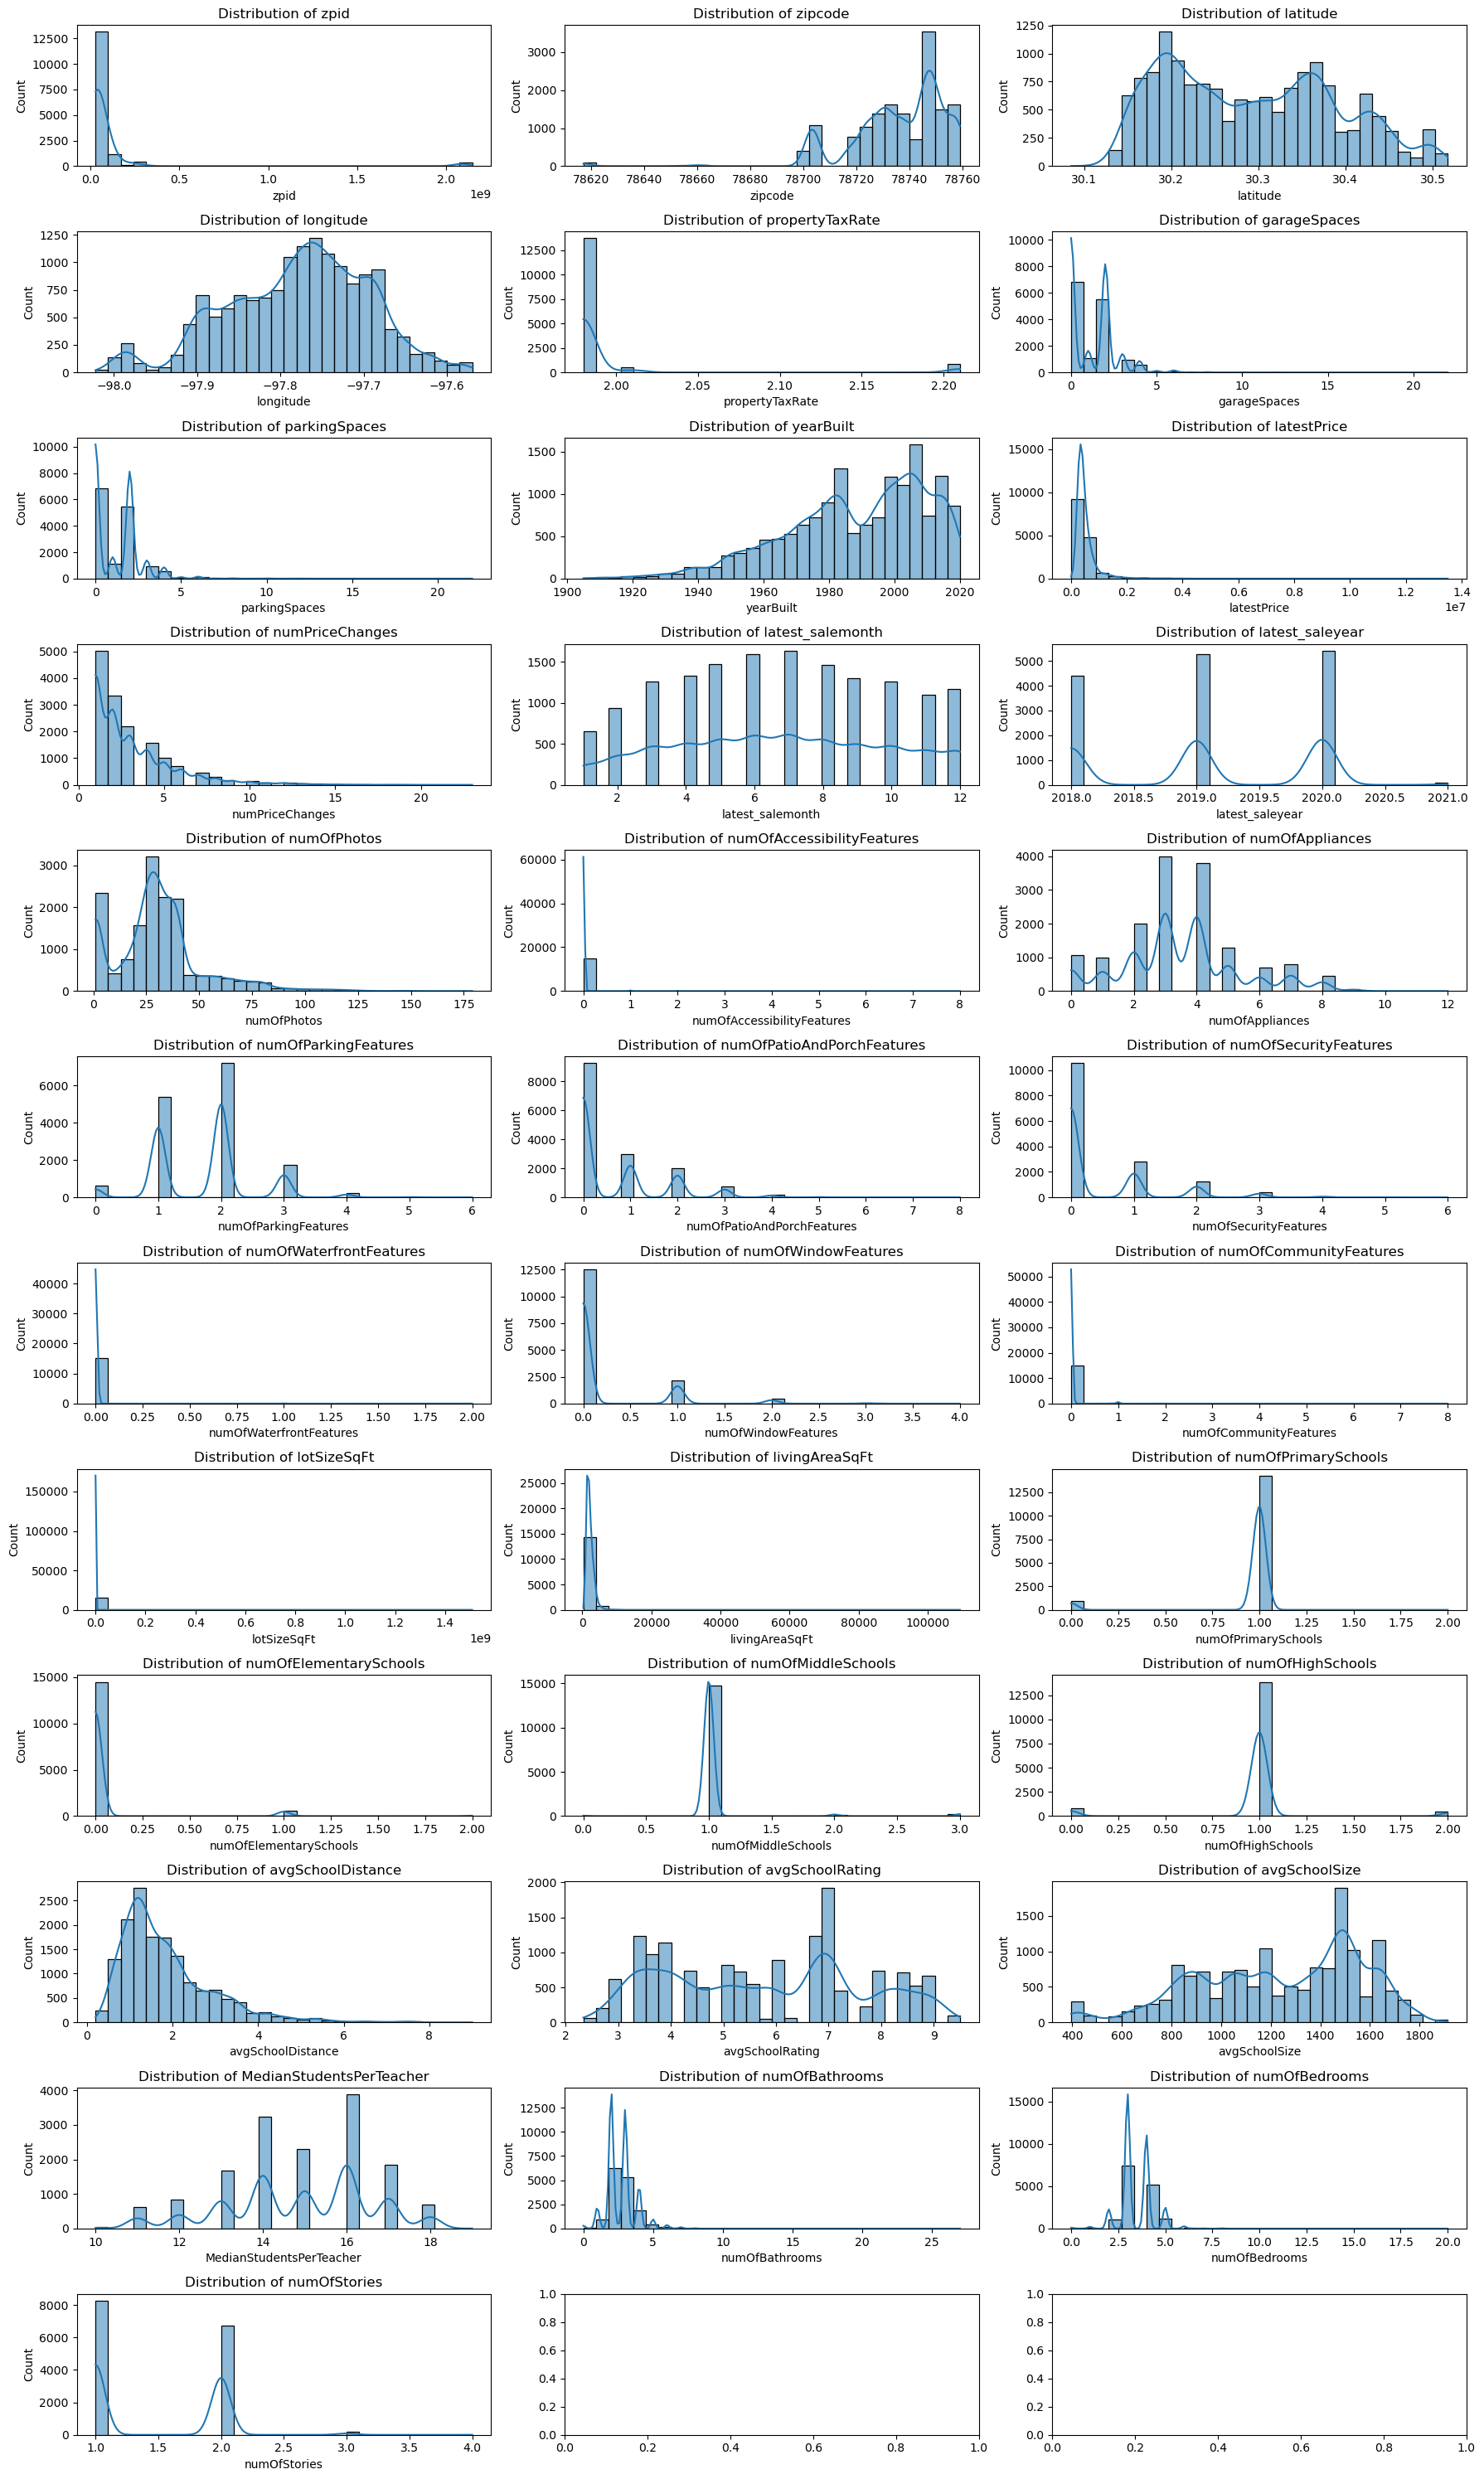

In [6]:
# Set up figure for histograms
fig, axes = plt.subplots(nrows=len(numeric_columns) // 3 + 1, ncols=3, figsize=(18, 30))
axes = axes.flatten()

# Plot histograms with KDE for each numerical column
for i, col in enumerate(numeric_columns):
    sns.histplot(df_housing[col].dropna(), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/2294179655.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_housing, x="numOfBedrooms", y=col, ax=axes[i], inner="quartile", palette="muted")
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/2294179655.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_housing, x="numOfBedrooms", y=col, ax=axes[i], inner="quartile", palette="muted")
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/2294179655.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

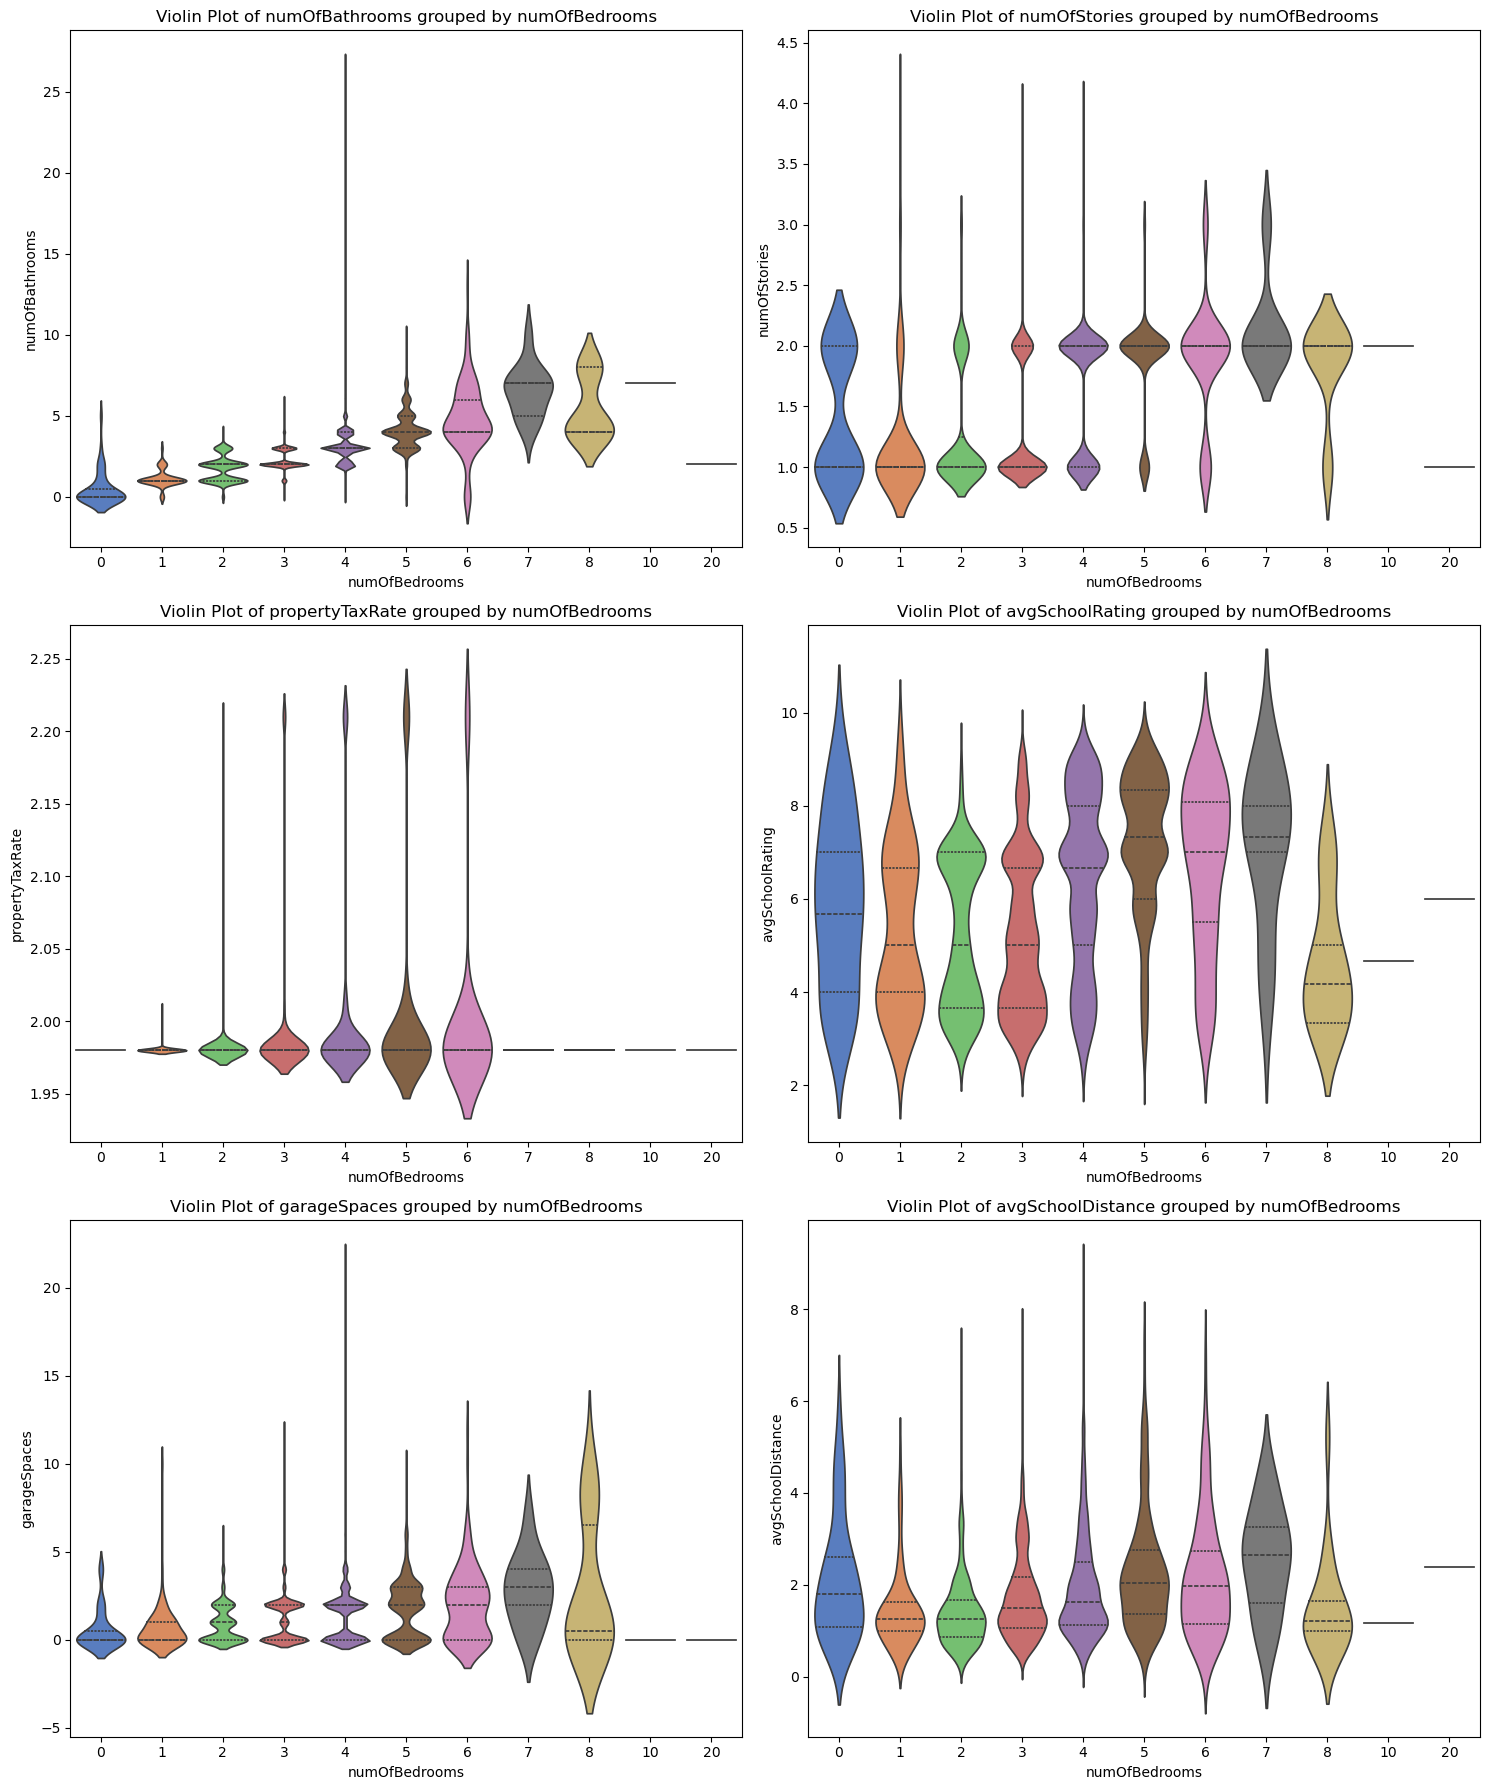

In [7]:
# Set up figure for violin plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Select key numerical features for visualization
num_features = ["numOfBathrooms", "numOfStories", "propertyTaxRate", "avgSchoolRating", "garageSpaces", "avgSchoolDistance"]

# Plot violin plots for numerical distributions
for i, col in enumerate(num_features):
    sns.violinplot(data=df_housing, x="numOfBedrooms", y=col, ax=axes[i], inner="quartile", palette="muted")
    axes[i].set_title(f'Violin Plot of {col} grouped by numOfBedrooms')

plt.tight_layout()
plt.show()

## **🔹 3. Grouped Histograms**
### **What We Do?**
- Compare distributions across **different categories** (e.g., bedroom count).
- Helps understand **how different groups impact a feature**.

### **Key Learnings**
✅ Helps detect **trends and relationships** in data.  
✅ Highlights **differences in property characteristics** across categories.  

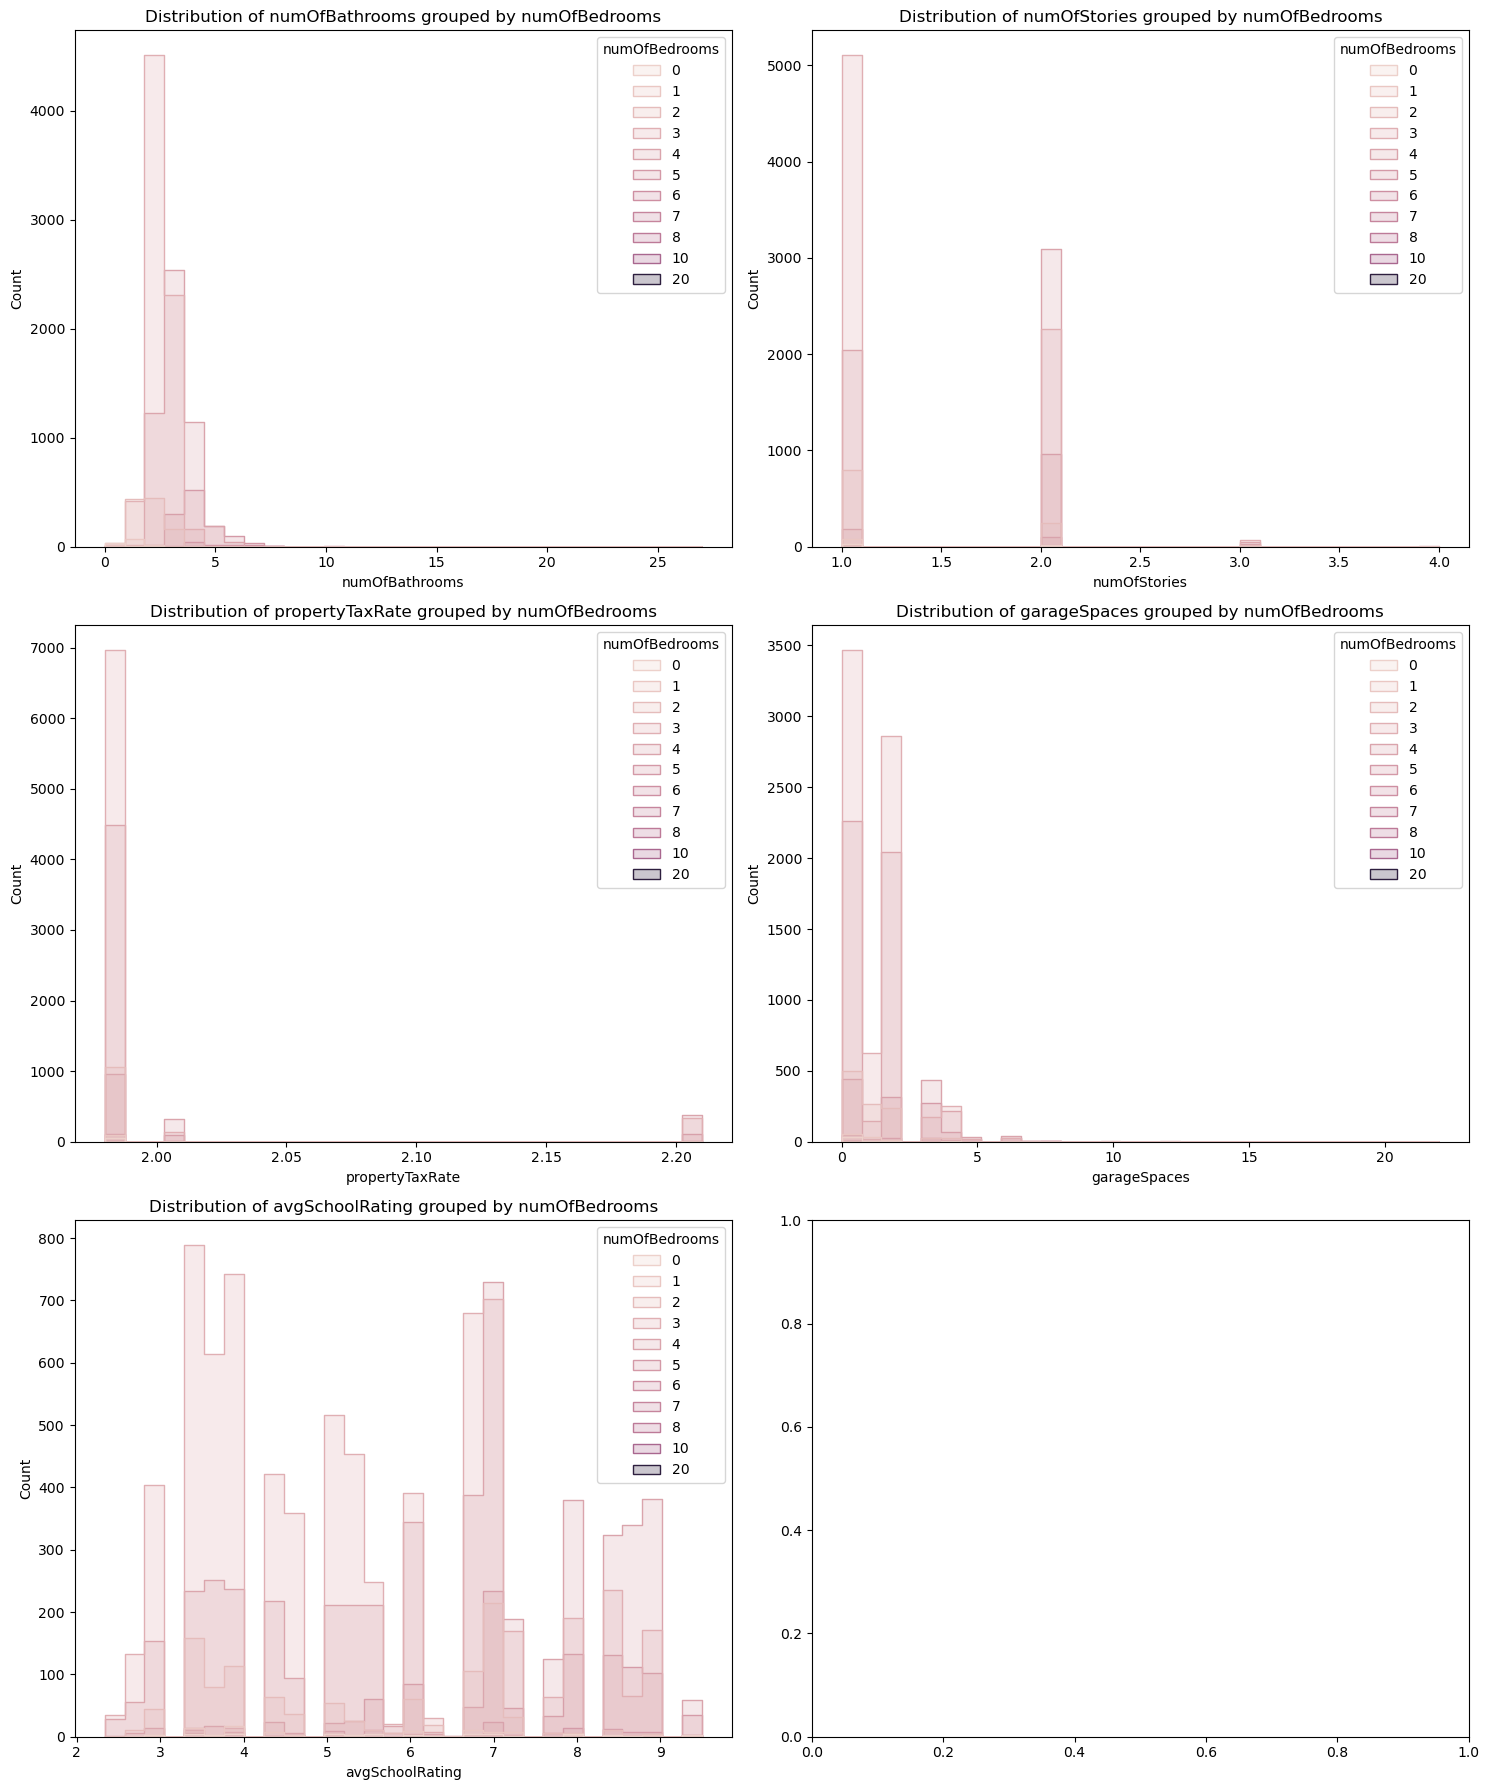

In [9]:
# Set up grouped histograms for selected numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Numerical features to compare across bedroom groups
num_features_grouped = ["numOfBathrooms", "numOfStories", "propertyTaxRate", "garageSpaces", "avgSchoolRating"]

# Plot grouped histograms
for i, col in enumerate(num_features_grouped):
    sns.histplot(data=df_housing, x=col, hue="numOfBedrooms", element="step", bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} grouped by numOfBedrooms')

plt.tight_layout()
plt.show()

## **🔹 4. Categorical Data Analysis**
### **What We Do?**
- **Bar plots** for total counts of categorical variables.

### **Key Learnings**
✅ Identifies **dominant categories** and **imbalanced data**.  
✅ Helps decide **which features to encode** for machine learning.  

/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1220561640.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1220561640.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1220561640.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_38103/1220561640.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. a

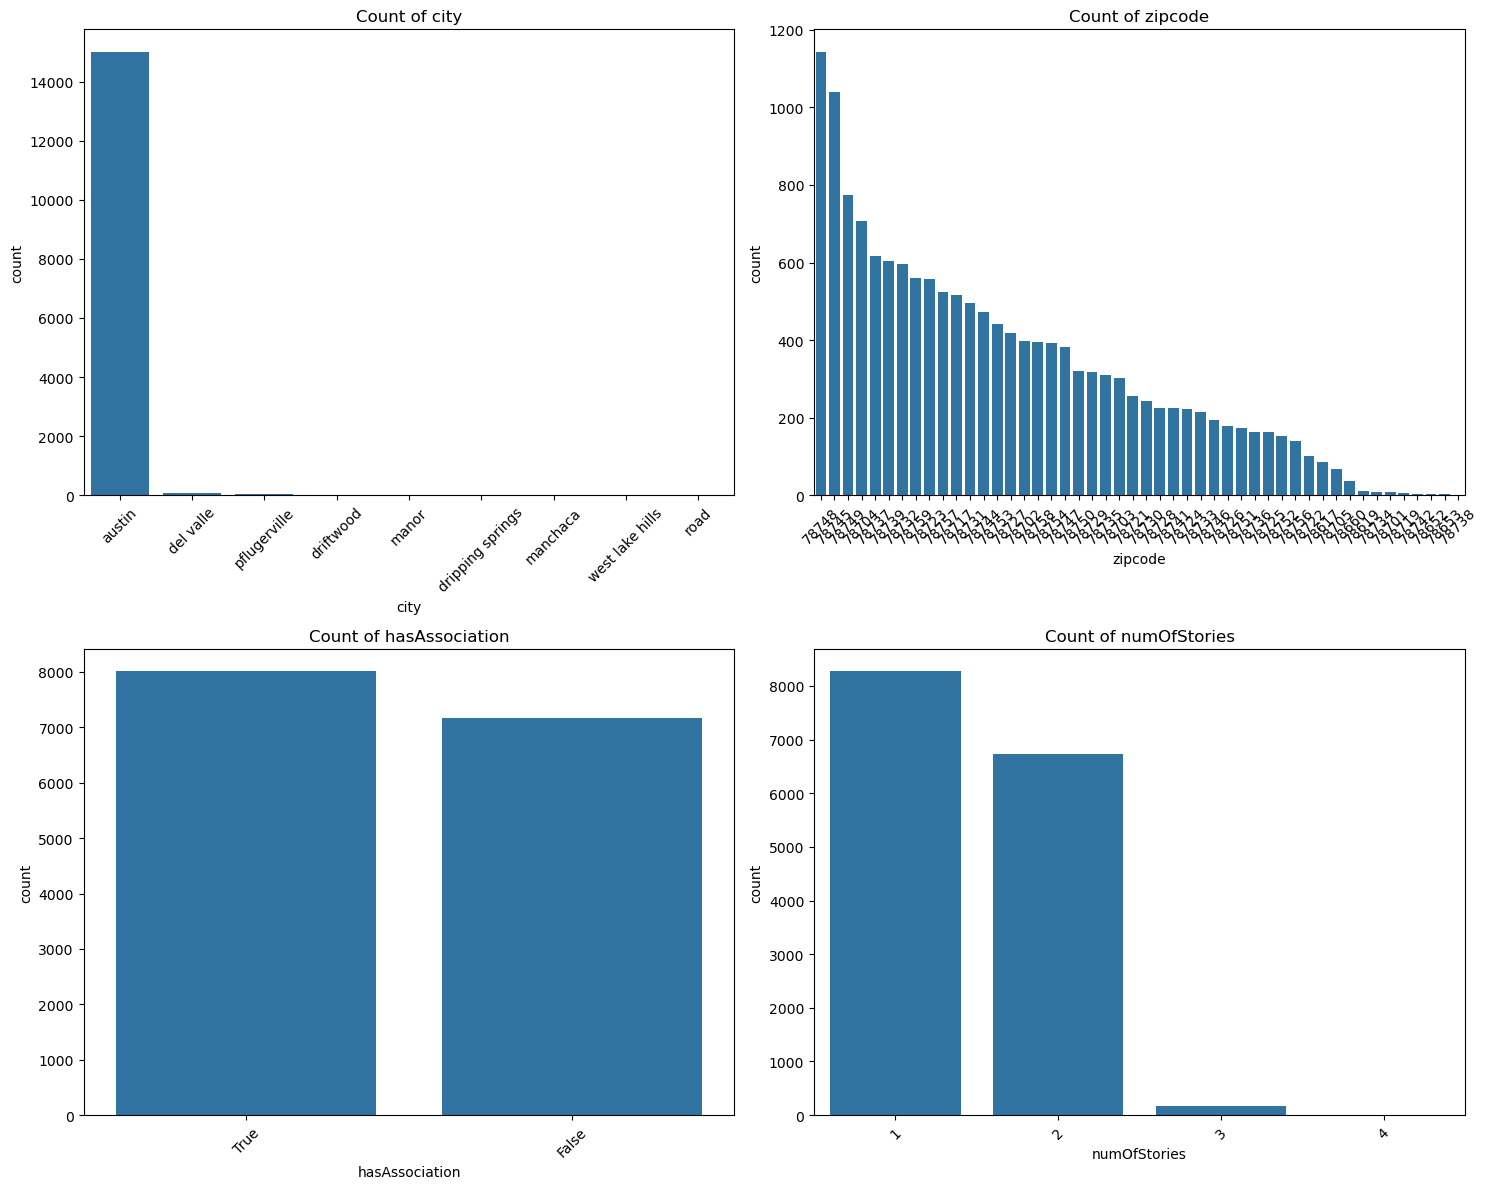

In [10]:
# Set up figure for bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Selected categorical features for analysis
cat_features = ["city", "zipcode", "hasAssociation", "numOfStories"]

# Plot bar charts
for i, col in enumerate(cat_features):
    sns.countplot(data=df_housing, x=col, ax=axes[i], order=df_housing[col].value_counts().index)
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## **🔹 5. Statistical Summary: Mean, Median, Mode**
### **What We Do?**
- Compute **mean, median, and mode** for all numerical features.

### **Key Learnings**
✅ **Detect skewness** → If Mean ≠ Median, transformation might be needed.  
✅ **Identify most common values** (Mode).  

In [12]:
# Compute mean, median, and mode for numerical features
mean_values = df_housing[numeric_columns].mean()
median_values = df_housing[numeric_columns].median()
mode_values = df_housing[numeric_columns].mode().iloc[0]  # mode() returns a DataFrame, select first mode

# Create DataFrame for statistics
stats_df = pd.DataFrame({"Mean": mean_values, "Median": median_values, "Mode": mode_values})

# Display the DataFrame in Jupyter Notebook
display(stats_df)  # Works only in Jupyter Notebook

# Print the DataFrame for terminal users
print("\n=== Mean, Median, and Mode Analysis ===\n")
print(stats_df)

# Save results to a CSV file
stats_df.to_csv("mean_median_mode.csv", index=True)

print("\n✅ Summary statistics saved as 'mean_median_mode.csv'")

,Mean,Median,Mode
zpid,1.044193e+08,2.949441e+07,2.858495e+07
zipcode,7.873593e+04,7.873900e+04,7.874800e+04
latitude,3.029160e+01,3.028442e+01,3.017970e+01
longitude,-9.777853e+01,-9.776954e+01,-9.776958e+01
propertyTaxRate,1.994085e+00,1.980000e+00,1.980000e+00
garageSpaces,1.229187e+00,1.000000e+00,0.000000e+00
parkingSpaces,1.224507e+00,1.000000e+00,0.000000e+00
yearBuilt,1.988555e+03,1.993000e+03,2.006000e+03
latestPrice,5.127677e+05,4.050000e+05,3.250000e+05
numPriceChanges,3.032892e+00,2.000000e+00,1.000000e+00



=== Mean, Median, and Mode Analysis ===

                                    Mean        Median          Mode
zpid                        1.044193e+08  2.949441e+07  2.858495e+07
zipcode                     7.873593e+04  7.873900e+04  7.874800e+04
latitude                    3.029160e+01  3.028442e+01  3.017970e+01
longitude                  -9.777853e+01 -9.776954e+01 -9.776958e+01
propertyTaxRate             1.994085e+00  1.980000e+00  1.980000e+00
garageSpaces                1.229187e+00  1.000000e+00  0.000000e+00
parkingSpaces               1.224507e+00  1.000000e+00  0.000000e+00
yearBuilt                   1.988555e+03  1.993000e+03  2.006000e+03
latestPrice                 5.127677e+05  4.050000e+05  3.250000e+05
numPriceChanges             3.032892e+00  2.000000e+00  1.000000e+00
latest_salemonth            6.733043e+00  7.000000e+00  7.000000e+00
latest_saleyear             2.019078e+03  2.019000e+03  2.020000e+03
numOfPhotos                 3.064043e+01  2.900000e+01  1.000

## **🔹 6. Conclusion & Next Steps**
✅ **Skewed Distributions** → Consider **normalization**.  
✅ **Outliers Present** → Need **handling before ML training**.  
✅ **Feature Encoding Required** → For categorical variables.  

🚀 **Next Steps:**
- **Bivariate Analysis** → Explore correlations.  
- **Feature Engineering** → Improve dataset usability.  
- **Prepare for Machine Learning Models!**  

# 🏠 Austin Housing Data - Exploratory Data Analysis (EDA) 📊

## **📌 Objective**
This notebook explores **real estate trends in Austin** by performing **Exploratory Data Analysis (EDA)**.  
We focus on:
- **Visualizing numerical distributions** using histograms, KDE plots, violin plots, and swarm plots.
- **Comparing grouped histograms** based on categorical features.
- **Analyzing categorical distributions** using bar plots.
- **Computing statistical summaries (Mean, Median, Mode)**.
- **Assessing data usability for machine learning models**.

---

## **🔹 1. Understanding the Dataset Structure**
### **What We Did?**
✅ Loaded the dataset and checked for missing values.  
✅ Identified **numerical and categorical features**.  

### **Key Learnings**
✅ **Some missing values** need handling via **imputation or removal**.  
✅ **Categorical variables require encoding** before machine learning.  

---

## **🔹 2. Univariate Analysis of Numerical Features**
### **What We Did?**
✅ Plotted **histograms & KDE plots** to visualize feature distributions.  
✅ Used **Violin plots** for deeper insights into numerical data.  

### **Key Learnings**
✅ **Property Tax Rate & Home Sizes** are **right-skewed**, meaning most values are **low**, but a few are **very high**.  
✅ Some variables have **bimodal distributions**, indicating **two property groups**.  
✅ **Potential outliers** were detected in **square footage and property values**, requiring **further handling**.  

---

## **🔹 3. Grouped Histograms: How Data Changes Across Categories**
### **What We Did?**
✅ Compared distributions **grouped by the number of bedrooms**.  

### **Key Learnings**
✅ **More bedrooms = More bathrooms, stories, and garage spaces**.  
✅ **School distance and tax rates** remain **fairly consistent** across different bedroom groups.  
✅ The **distribution of square footage & property values shifts** significantly between groups.  

---

## **🔹 4. Categorical Feature Analysis**
### **What We Did?**
✅ Plotted **bar charts** for categorical variables (`city`, `zipcode`, `hasAssociation`).  

### **Key Learnings**
✅ **Some cities & zip codes dominate** the dataset, meaning the data is **not evenly distributed**.  
✅ Many properties belong to **Homeowner Associations (HOAs)**, which could impact **fees & taxes**.  
✅ The **majority of homes are one-story**, but two-story homes are still common.  

---

## **🔹 5. Statistical Summary: Mean, Median, and Mode**
### **What We Did?**
✅ Calculated **mean, median, and mode** for all numerical features.  

### **Key Learnings**
✅ **Property Tax Rate** has a nearly **normal distribution** (mean ≈ median).  
✅ **Large differences between mean and median** (e.g., home price, square footage) indicate **skewed distributions**.  
✅ **Mode helps identify the most common property characteristics**, useful for **predictive modeling**.  

---

## **🔹 6. Conclusion & Data Usability**
### **1️⃣ Is the Data Usable?**
✅ **Yes**, but preprocessing is needed:  
- **Handle missing values** (imputation or removal).  
- **Normalize skewed distributions** (log transformation or scaling).  
- **Encode categorical variables** for machine learning models.  

### **2️⃣ What is the Overall Shape of the Distributions?**
✅ **Mostly right-skewed** → Some variables have extreme values (e.g., property prices).  
✅ Some features are **bimodal**, meaning there are **two distinct property groups**.  

### **3️⃣ Are There Outliers?**
✅ **Yes, particularly in home prices, square footage, and tax rates.**  
- Some **luxury homes have extreme values**, which may distort ML models.  
- Outliers should be **handled via transformation or capping**.  

### **4️⃣ How Do Related Features Compare?**
✅ **More bedrooms generally mean:**  
- More bathrooms, garages, and larger square footage.  
- Higher property taxes and HOA fees.  

### **5️⃣ How Do Bin Sizes Affect Histograms?**
✅ Smaller bins **highlight individual clusters and outliers**.  
✅ Larger bins **smooth the distribution**, making general trends easier to see.  

---

# <span style="color:blue">Week 5</span>

## Data Analys of Data set

# 🏠 Austin Housing Data - Bivariate Analysis 📊

## **📌 Objective**
In this section, we analyze **relationships between two variables** to uncover correlations and trends.  
We focus on:
- **Scatter plots** → Understanding numerical relationships (e.g., price vs. square footage).
- **Correlation matrix & heatmap** → Identifying strong & weak feature relationships.
- **Box plots** → Examining price distribution across categorical features.
- **Pair plots** → Visualizing multiple relationships at once.

---

## **🔹 1. Scatter Plots: Relationship Between Key Features**
### **What We Do?**
✅ Generate **scatter plots** to check for **linear relationships** between numerical variables.  

### **Key Learnings**
✅ **Living Area (SqFt) vs. Price**: Larger homes **tend to be more expensive**, but some outliers exist.  
✅ **Number of Bedrooms & Bathrooms vs. Price**: More rooms generally **increase price**, but with **some variation**.  
✅ **Garage Spaces vs. Price**: Homes with **larger garages tend to be pricier**, but it's not a perfect trend.  
✅ **Property Tax Rate vs. Price**: **No strong correlation** found.  

---

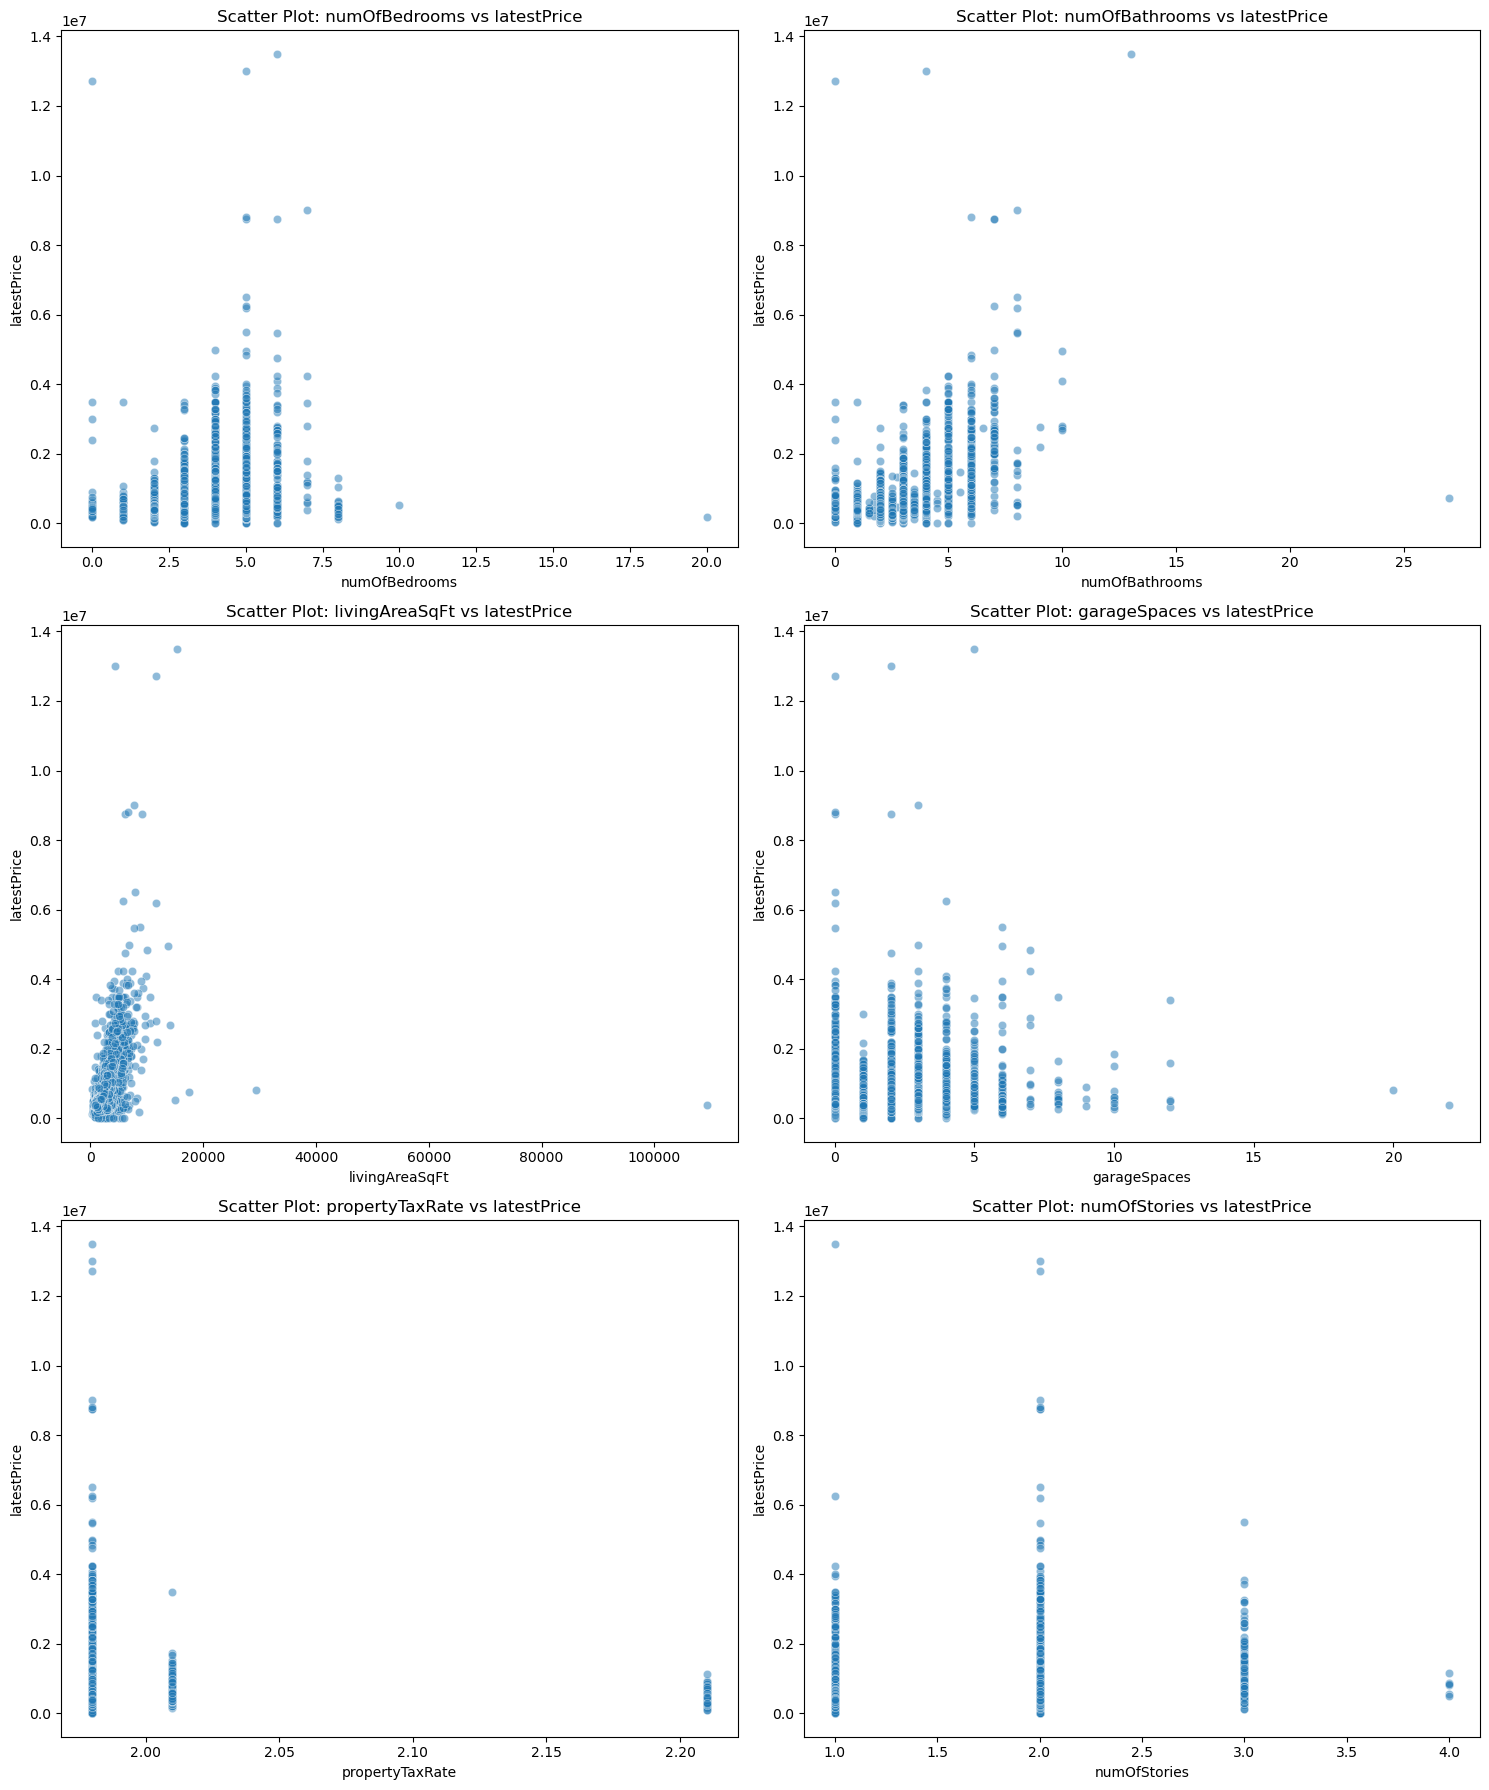

In [13]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "austinHousingData.csv"
df_housing = pd.read_csv(file_path)

# Select key numerical features for scatter plots
scatter_features = [("numOfBedrooms", "latestPrice"), 
                    ("numOfBathrooms", "latestPrice"), 
                    ("livingAreaSqFt", "latestPrice"), 
                    ("garageSpaces", "latestPrice"),
                    ("propertyTaxRate", "latestPrice"),
                    ("numOfStories", "latestPrice")]

# Set up figure for scatter plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
axes = axes.flatten()

# Generate scatter plots for selected numerical relationships
for i, (x_col, y_col) in enumerate(scatter_features):
    sns.scatterplot(data=df_housing, x=x_col, y=y_col, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {x_col} vs {y_col}')

plt.tight_layout()
plt.show()